##Project Title : Sales Data Analysis and Dashboard
##Project Overview:
The project involves analyzing sales data to derive meaningful insights and creating a dashboard to visualize these insights. The analysis will include key performance indicators (KPIs) such as total sales, average sales per region, top-selling products, sales trends over time, and more.

*Task 1* : Load the Dataset and Display the First Few Rows.

1.Load the Dataset:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
file_path = '/content/drive/MyDrive/Online Sales Data.csv'
df = pd.read_csv(file_path)

2.Display the First Few Rows:

In [9]:
df.head(8)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal


*Task 2* : Clean the Dataset by Handling Missing Values and Correcting Data Types

3.Check for Missing Values:

In [10]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


4.Handle Missing Values:

Fill missing values with appropriate values or drop rows/columns with missing values.

But here data contaains no missing values hence no need of this step.

5.Correct Data Types:

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Revenue'] = df['Total Revenue'].astype(float)
df['Unit Price'] = df['Unit Price'].astype(float)

6.Verify Changes:

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB
None


*Task 3* : Calculate Total Revenue and Total Quantity Sold

1.Calculate Total Revenue:

In [14]:
total_revenue = df['Total Revenue'].sum()
print(f"Total Revenue: ${total_revenue}")


Total Revenue: $80567.84999999999


2.Calculate Total Quantity Sold:

In [15]:
total_quantity_sold = df['Units Sold'].sum()
print(f"Total Quantity Sold: {total_quantity_sold}")


Total Quantity Sold: 518


*Task 4* : Identify the Top 10 Best-Selling Products

1.Group by Product and Sum Quantities Sold

In [16]:
top_products = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10)
print(top_products)


Product Name
Hanes ComfortSoft T-Shirt                  10
The Catcher in the Rye by J.D. Salinger     7
Yeti Rambler Tumbler                        6
Gap Essential Crewneck T-Shirt              6
Spalding NBA Street Basketball              6
Nike Air Force 1                            6
Forever 21 Graphic Tee                      5
Under Armour HeatGear T-Shirt               5
The Silent Patient by Alex Michaelides      5
Calvin Klein Boxer Briefs                   5
Name: Units Sold, dtype: int64


*Task 5* : Analyze Sales Trends Over the Last Year

1.Set Date Column as Index:

In [17]:
df.set_index('Date', inplace=True)


2.Resample Data to Monthly Frequency and Sum Revenue:

In [18]:
monthly_sales = df['Total Revenue'].resample('M').sum()
print(monthly_sales)


Date
2024-01-31    14548.32
2024-02-29    10803.37
2024-03-31    12849.24
2024-04-30    12451.69
2024-05-31     8455.49
2024-06-30     7384.55
2024-07-31     6797.08
2024-08-31     7278.11
Freq: M, Name: Total Revenue, dtype: float64


3.Plot Monthly Sales Trend:

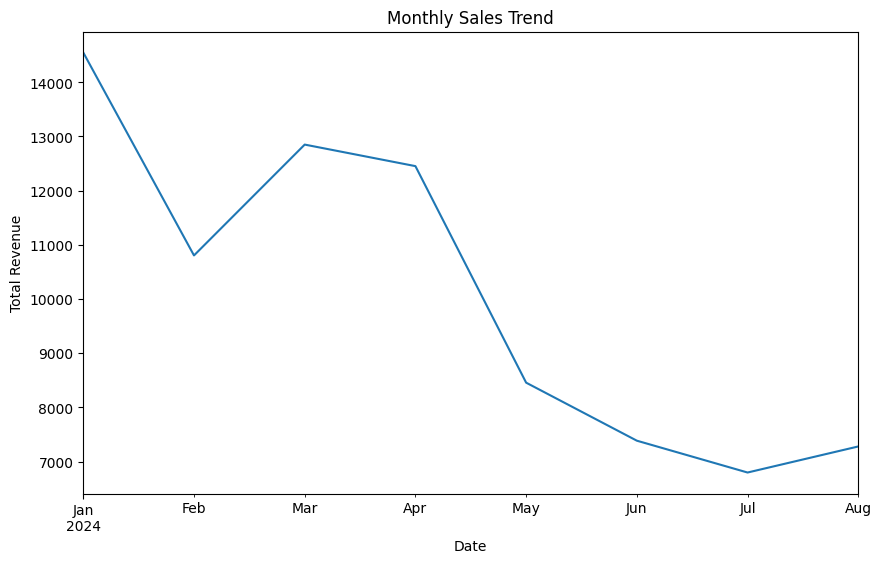

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


*Task 6* : Create a Bar Chart Showing Sales by Region

1.Group by Region and Sum Revenue:

In [20]:
sales_by_region = df.groupby('Region')['Total Revenue'].sum()


2.Plot Bar Chart:

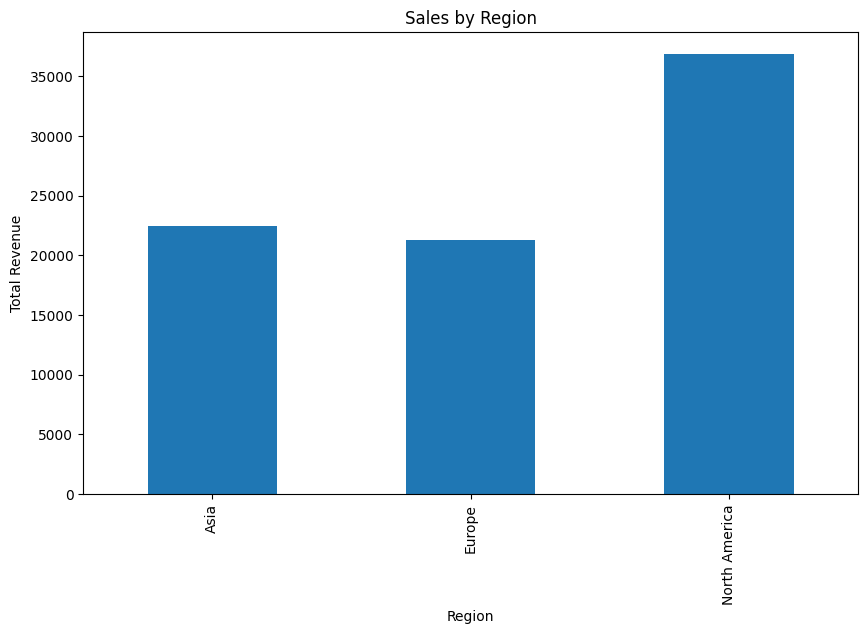

In [21]:
sales_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


*Task 7* : Create a Line Chart Showing Sales Trends Over Time

1.Plot Line Chart:

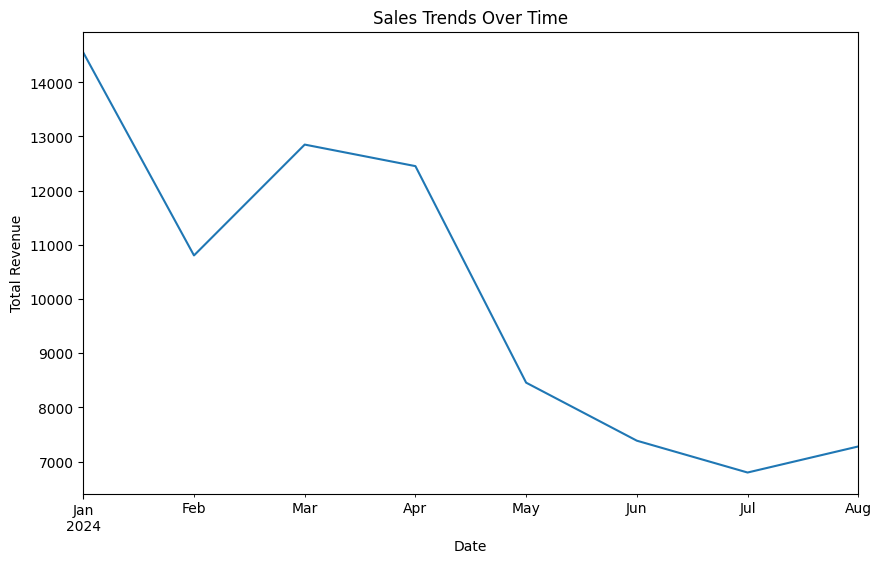

In [22]:
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


*Task 8*: Simple Dashboard to Display Key Insights

1.Displaying Key Insights:

In [23]:
# Display total revenue and total quantity sold
print(f"Total Revenue: ${total_revenue}")
print(f"Total Quantity Sold: {total_quantity_sold}")

# Display top 10 best-selling products
print("Top 10 Best-Selling Products:")
print(top_products)

# Display sales by region
print("Sales by Region:")
print(sales_by_region)


Total Revenue: $80567.84999999999
Total Quantity Sold: 518
Top 10 Best-Selling Products:
Product Name
Hanes ComfortSoft T-Shirt                  10
The Catcher in the Rye by J.D. Salinger     7
Yeti Rambler Tumbler                        6
Gap Essential Crewneck T-Shirt              6
Spalding NBA Street Basketball              6
Nike Air Force 1                            6
Forever 21 Graphic Tee                      5
Under Armour HeatGear T-Shirt               5
The Silent Patient by Alex Michaelides      5
Calvin Klein Boxer Briefs                   5
Name: Units Sold, dtype: int64
Sales by Region:
Region
Asia             22455.45
Europe           21268.06
North America    36844.34
Name: Total Revenue, dtype: float64


2.Create Visualizations:

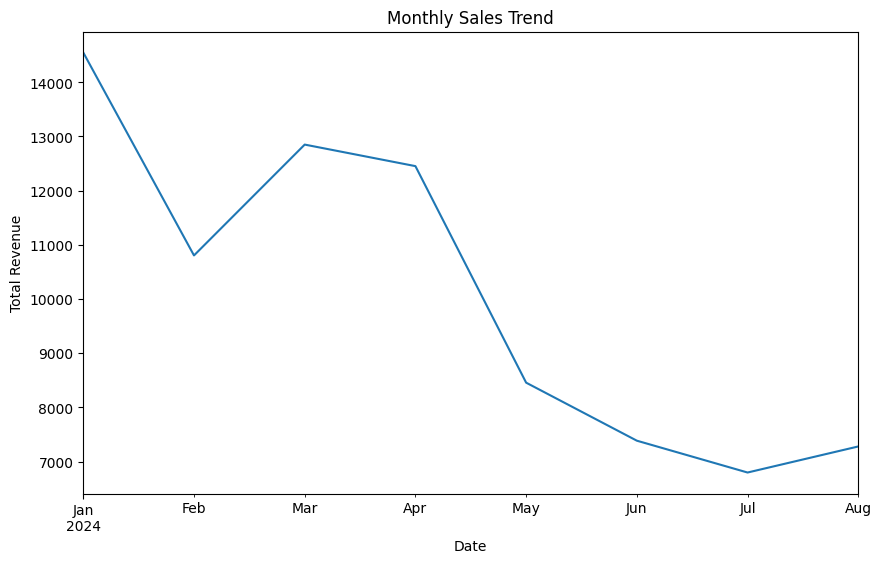

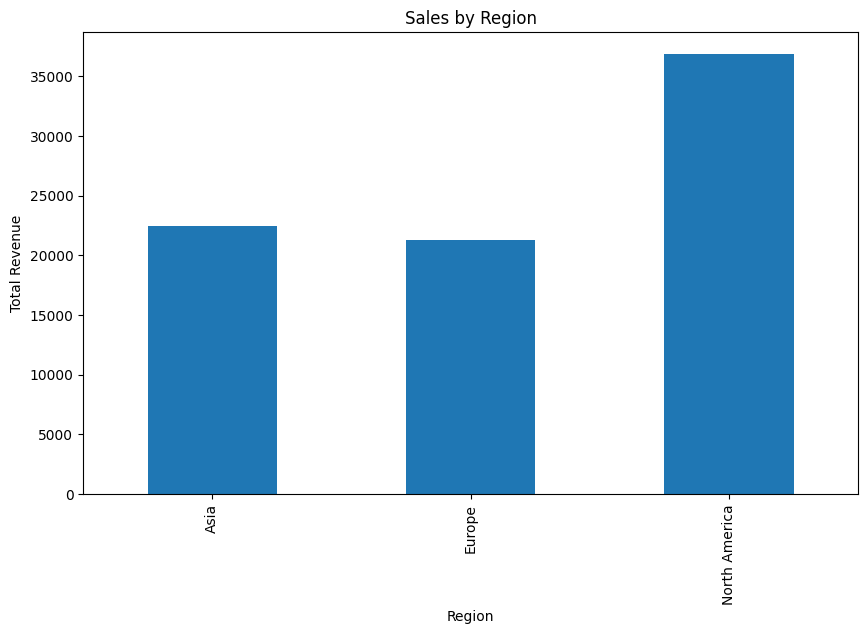

In [24]:
# Monthly Sales Trend
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

# Sales by Region
sales_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


Interactive Dashboard with Plotly:


In [25]:
import plotly.express as px

# Interactive Line Chart for Monthly Sales Trend
fig = px.line(monthly_sales, title='Monthly Sales Trend', labels={'value': 'Total Revenue', 'index': 'Date'})
fig.show()

# Interactive Bar Chart for Sales by Region
fig = px.bar(sales_by_region, title='Sales by Region', labels={'value': 'Total Revenue', 'index': 'Region'})
fig.show()
